## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import iqr
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#count total records
len(study_results)

1893

In [3]:
# Combine the data into a single dataset
study_data_merged= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_merged.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
#len(school_data_complete["school_name"].unique())
len(study_data_merged["Mouse ID"])

1893

In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#identify all dupicate records
mouse_dups = study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'],keep = False)]

#rename Mouse Id to MouseID to allow unique array formula to work
mouse_dups = mouse_dups.rename(columns={'Mouse ID': 'MouseID'})

#Identiy unique list of duplicate mouse ids. 
# CP Note: There is only one
mouse_dups.MouseID.unique()


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

# same as formula above. Identify dupicates based on the combination of the Mouse ID and Timpoint columns 
# and show all occurrances (keep = False)

study_results[study_results.duplicated(subset=['Mouse ID', 'Timepoint'],keep = False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Drop duplicate study data
study_results_clean = study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep = False)

# Combine the data into a single dataset
study_data_merged_clean= pd.merge(study_results_clean, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
study_data_merged_clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
#CP Note Total Count reduced by the 10 dupicate records

len(study_data_merged_clean["Mouse ID"])

1883

In [9]:
#Just to observe the describe function
study_data_merged_clean.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1883.000000,1883.000000,1883.000000,1883.00000,1883.000000
mean,19.622942,50.449310,1.025491,12.77111,25.660648
std,14.090045,8.914637,1.139284,7.18380,3.931950
min,0.000000,22.050126,0.000000,1.00000,15.000000
25%,5.000000,45.000000,0.000000,7.00000,25.000000
50%,20.000000,48.951368,1.000000,13.00000,27.000000
75%,30.000000,56.346321,2.000000,20.00000,29.000000
max,45.000000,78.567014,4.000000,24.00000,30.000000


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Define Group - narrow the field list to two then group by Drug Regimen
summary_stats = study_data_merged_clean[["Drug Regimen", "Tumor Volume (mm3)"]]
group_stats = summary_stats.groupby(["Drug Regimen"])

#Calculate Stats:
count = group_stats["Tumor Volume (mm3)"].count()
mean = group_stats["Tumor Volume (mm3)"].mean()
med = group_stats["Tumor Volume (mm3)"].median()
var = group_stats["Tumor Volume (mm3)"].var()
std_dev = group_stats["Tumor Volume (mm3)"].std()
sem = group_stats["Tumor Volume (mm3)"].sem()

#Build Summary Data Frame
Drug_Performance_Stats_df = pd.DataFrame({
    "Measurement Count" : count,
    "Mean":mean,
    "Median":med,
    "Variance":var,
    "Standard Deviation":std_dev,
    "SEM":sem    
})

#format dataframe results all the same
Fmt_Drug_Performance_Stats_df = Drug_Performance_Stats_df.style.format('{:.2f}')

#Save table for potential reference in the report
Drug_Performance_Stats_df.to_csv("Drug_Performance_Stats_df.csv", index=False, header=True)

#Display results
Fmt_Drug_Performance_Stats_df

,Measurement Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230.00,40.68,41.56,24.95,4.99,0.33
Ceftamin,178.00,52.59,51.78,39.29,6.27,0.47
Infubinol,178.00,52.88,51.82,43.13,6.57,0.49
Ketapril,188.00,55.24,53.70,68.55,8.28,0.60
Naftisol,186.00,54.33,52.51,66.17,8.13,0.60
Placebo,181.00,54.03,52.29,61.17,7.82,0.58
Propriva,151.00,52.46,50.85,44.05,6.64,0.54
Ramicane,228.00,40.22,40.67,23.49,4.85,0.32
Stelasyn,181.00,54.23,52.43,59.45,7.71,0.57


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
study_data_merged_clean[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["count","mean", "median", "var", "std", "sem"]}).style.format('{:.2f}')



## Bar and Pie Charts

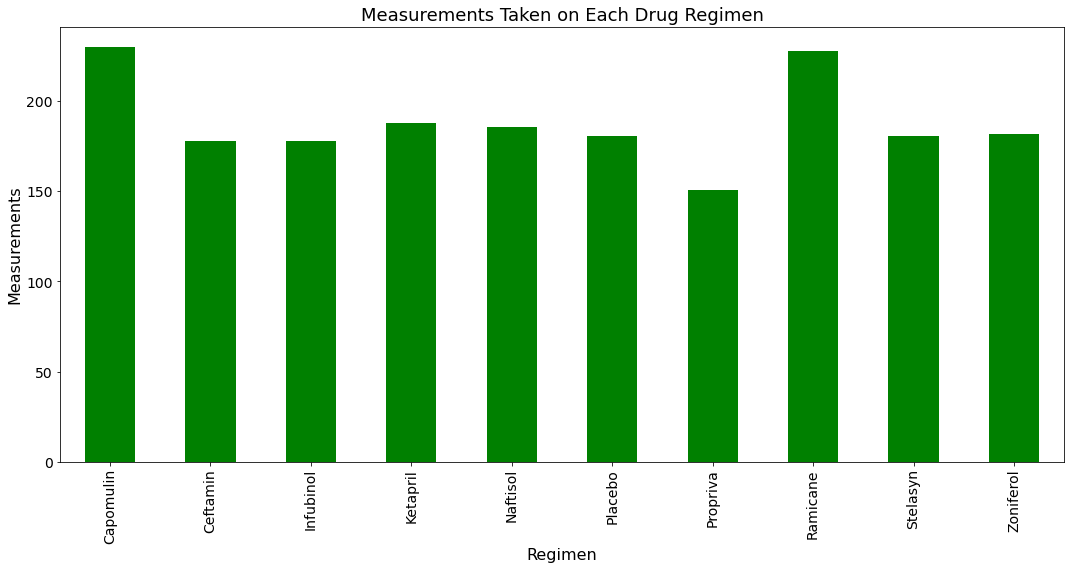

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Pull measurement count per treatment from the Drug Performance Stats dataframe
meas_count_per_treatment = Drug_Performance_Stats_df["Measurement Count"]

#Plot Chart
measure_plot = meas_count_per_treatment.plot.bar(figsize=(18,8), color='g',fontsize = 14)
plt.xlabel("Regimen",fontsize = 16)
plt.ylabel("Measurements",fontsize = 16)
plt.title("Measurements Taken on Each Drug Regimen",fontsize = 18)

#Save image for potential reference in the report
plt.savefig("meas_count_per_treatment_Pandas.png")

plt.show()

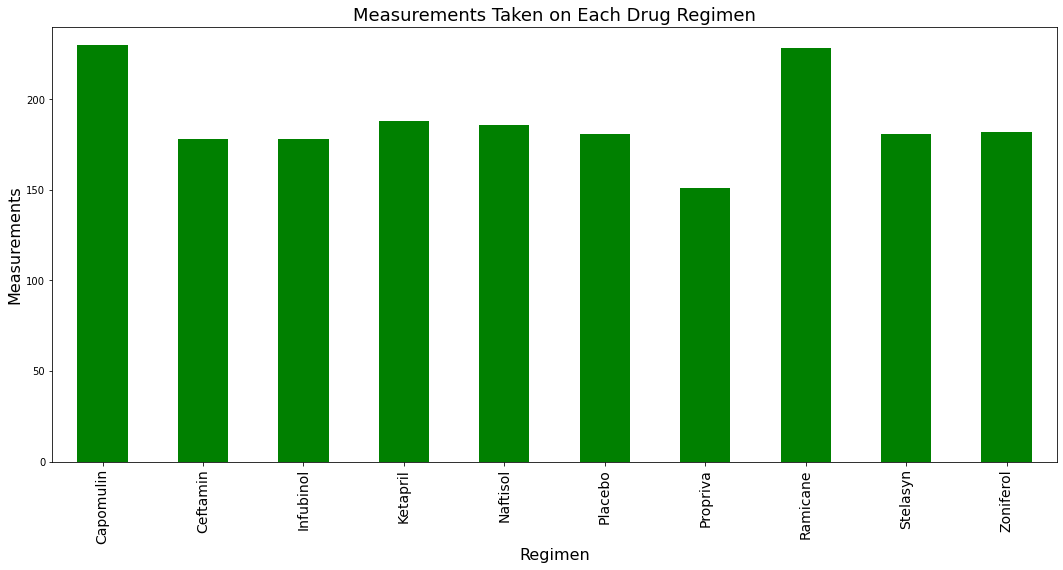

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#  Create an array that contains the number of measurements each drug regimen has. CP Note - use previously measurement data
measures =(meas_count_per_treatment).tolist()

#Establish x axis as count of measures per treatment
x_axis = np.arange(len(meas_count_per_treatment))

#Charactorize figure size/layout
fig1, ax1 = plt.subplots(figsize=(18, 8))

#generate bar plot referencing the just created "measures"
plt.bar(x_axis, measures, color='g', align='center',width = .5)

#establish ticks, lable them, and set font size
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical', fontsize = 14)

#establish plot x and y limits for better look and feel
plt.xlim(-0.50, len(x_axis)-0.50)
plt.ylim(0, max(measures)+10)

#Lable axis and title plot
plt.xlabel("Regimen",fontsize = 16)
plt.ylabel("Measurements",fontsize = 16)
plt.title("Measurements Taken on Each Drug Regimen",fontsize = 18)

#Save image for potential reference in the report
plt.savefig("Measurements Taken on Each Drug Regimen_pyplot")

In [130]:
#Build a dataframe with grouped gender in support of the plot below

#Define Group
gender_group_stats= mouse_metadata.groupby(["Sex"])

#Calculate Stats:
count = gender_group_stats["Sex"].count()
total = len(mouse_metadata["Mouse ID"].unique())
#Build Gender Count Summary Data Frame
Gender_Count_df = pd.DataFrame({
    "Gender Count" : count,
    "Percent" : count/total*100
})

#Display results
Gender_Count_df 

,Gender Count,Percent
Sex,,
Female,124,49.799197
Male,125,50.200803


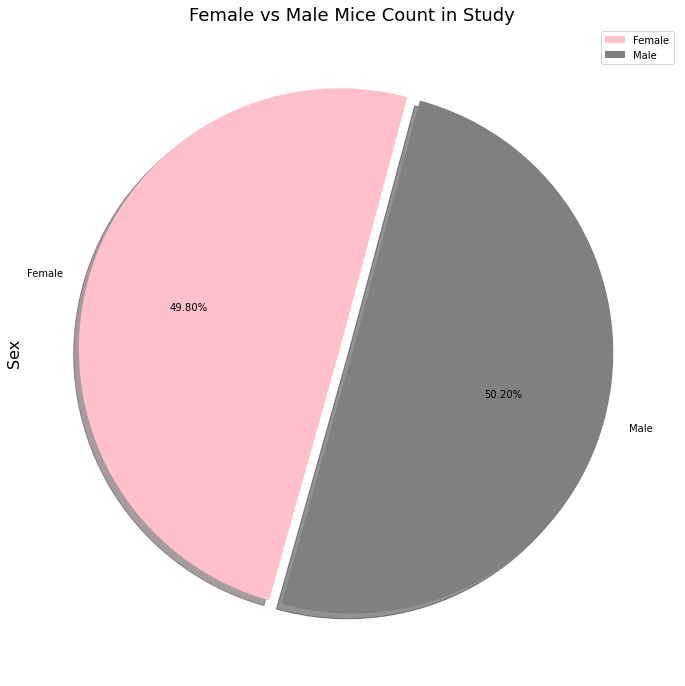

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#set gender colors
colors = ['pink', 'grey']

#set explode distance
explode = (0.05, 0)

#Plot using Gender count dataframe built in previous step (Gender_Count_df). Format for desired look and feel
plot = Gender_Count_df.plot.pie(y='Gender Count',figsize=(12,12), colors = colors, startangle=75, explode = explode, shadow = True, autopct="%1.2f%%")

#Title axis
plt.title('Female vs Male Mice Count in Study',fontsize = 18)
plt.ylabel('Sex',fontsize = 16)

#Save image for potential reference in the report
plt.savefig("female_versus_male_pandas.png")
plt.show()

In [132]:
#  Create an array that contains the female / male percentages
percentages = Gender_Count_df["Percent"].tolist()

percentages


[49.79919678714859, 50.20080321285141]

<ipython-input-145-c0afd2ff639c>:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes,explode=explode,labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=75,)


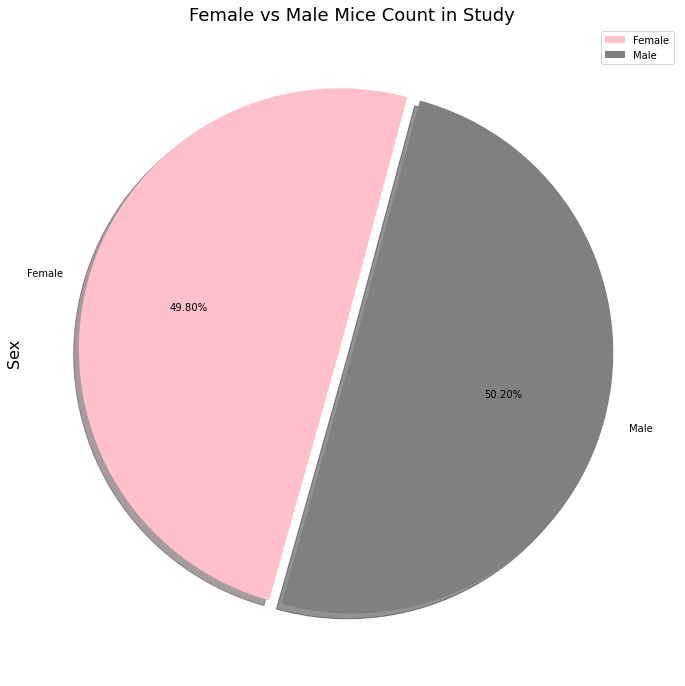

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#set gender colors
colors = ['pink', 'grey']

#set explode distance
explode = (0.05, 0)

#List the values of each section of the pie chart use percentages list created in previous cell
sizes = [percentages]

#Establish the pie chart figure and estblish size
fig1, ax1 = plt.subplots(figsize=(12, 12))

#Create the pie chart and set formatting for best look and feel
plt.pie(sizes,explode=explode,labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=75,)
plt.title('Female vs Male Mice Count in Study',fontsize = 18)
plt.ylabel('Sex',fontsize = 16)

# create Female/Male labels
labels = ["Female","Male"]

#create plot legend
plt.legend(labels, loc="upper right")

#Save image for potential reference in the report
plt.savefig("female_versus_male_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [117]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#CP NOTE : SEE RESPONSES BELOW. 

In [12]:
# Part 1 - Generate a summary statistics table of last (greatest) timepoint for each mouse

#Define Group - narrow the field list to two then group by Drug Regimen
summary_stats = study_data_merged_clean[["Mouse ID", "Timepoint"]]
group_stats = summary_stats.groupby(["Mouse ID"])

#Calculate Stats:
max_count = group_stats["Timepoint"].max()

#Build Summary Data Frame
MaxTimePointsPerMouse = pd.DataFrame({
    "MaxTimePoint" : max_count
    })
MaxTimePointsPerMouse.head(3)


,MaxTimePoint
Mouse ID,
a203,45
a251,45
a262,45


In [17]:
# Part 2 Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_point_dat_merged= pd.merge(MaxTimePointsPerMouse, study_data_merged_clean,
                               how = "left", on=["Mouse ID", "Mouse ID"])

# Narrow list to Max time points only (filter on MaxTimePoint = Timepoint to narrow to final results only)
max_data_stats= max_point_dat_merged[max_point_dat_merged["MaxTimePoint"]==max_point_dat_merged["Timepoint"]]
max_data_stats

,Mouse ID,MaxTimePoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,45,70.717621,4,Placebo,Female,17,29
39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
1842,z435,10,10,48.710661,0,Propriva,Female,12,26
1852,z578,45,45,30.638696,0,Ramicane,Male,11,16
1862,z581,45,45,62.754451,3,Infubinol,Female,24,25
1872,z795,45,45,65.741070,3,Naftisol,Female,13,29


In [120]:
#experimented resetting indexes
#MaxTimePointsPerMouse.reset_index(drop=True).head(2)
#study_data_merged_clean.reset_index(drop=True).head(2)
#max_data_stats.reset_index(drop=True).head(2)

In [121]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
#CP NOTE : SEE RESPONSES BELOW. I did not get there exactly the same way as described above

In [18]:
# Estblish results set for each Drug Regimen then Calculate all Quantile Stats (IRQ, Upper, Lower, Median, Upper bound
# and Lower bound for each - Results above Upper bound or below lower bound could be outliers)

Capomulin_df = max_data_stats.loc[max_data_stats["Drug Regimen"] == "Capomulin",:]
Ramicane_df = max_data_stats.loc[max_data_stats["Drug Regimen"] == "Ramicane", :]
Infubinol_df = max_data_stats.loc[max_data_stats["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = max_data_stats.loc[max_data_stats["Drug Regimen"] == "Ceftamin", :]


In [144]:
#Calculate Capomulin Stats

Capomulin_qtls = Capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Lower_cap_qtl = Capomulin_qtls[.25]
Upper_cap_qtl = Capomulin_qtls[.75]
Median_cap_qtl = Capomulin_qtls[.50]
irq_cap = Upper_cap_qtl - Lower_cap_qtl
lower_cap_bound = Lower_cap_qtl - (1.5*irq_cap)
higher_cap_bound = Upper_cap_qtl + (1.5*irq_cap)

#Dataframe Capomulin Stats
Capomulin_Df = pd.DataFrame({
    "Drug_Regimin" : "Capomulin",
    "Lower_cap_qtl" : Lower_cap_qtl,
    "Upper_cap_qtl"  : Upper_cap_qtl,
    "irq_cap" : irq_cap,
    "Median_cap_qtl" : Median_cap_qtl,
    "lower_cap_bound" : lower_cap_bound,
    "higher_cap_bound" : higher_cap_bound
},index=[0])

Capomulin_Df


,Drug_Regimin,Lower_cap_qtl,Upper_cap_qtl,irq_cap,Median_cap_qtl,lower_cap_bound,higher_cap_bound
0,Capomulin,32.377357,40.15922,7.781863,38.125164,20.704562,51.832015


In [140]:
#Calculate Ramicane Stats

Ramicane_qtls = Ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Lower_ram_qtl = Ramicane_qtls[.25]
Upper_ram_qtl = Ramicane_qtls[.75]
Median_ram_qtl = Ramicane_qtls[.50]
irq_ram = Upper_ram_qtl - Lower_ram_qtl
lower_ram_bound = Lower_ram_qtl - (1.5*irq_ram)
higher_ram_bound = Upper_ram_qtl + (1.5*irq_ram)

#Dataframe Ramicane Stats
Ramicane_Df = pd.DataFrame({
    "Drug_Regimin" : "Ramicane",
    "Lower_ram_qtl" : Lower_ram_qtl,
    "Upper_ram_qtl"  : Upper_ram_qtl,
    "irq_ram" : irq_ram,
    "Median_ram_qtl" : Median_ram_qtl,
    "lower_ram_bound" : lower_ram_bound,
    "higher_ram_bound" : higher_ram_bound
},index=[0])

Ramicane_Df

,Drug_Regimin,Lower_ram_qtl,Upper_ram_qtl,irq_ram,Median_ram_qtl,lower_ram_bound,higher_ram_bound
0,Ramicane,31.56047,40.659006,9.098537,36.561652,17.912664,54.306811


In [141]:
#Calculate Infubinol Stats

Infubinol_qtls = Infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Lower_inf_qtl = Infubinol_qtls[.25]
Upper_inf_qtl = Infubinol_qtls[.75]
Median_inf_qtl = Infubinol_qtls[.50]
irq_inf = Upper_inf_qtl - Lower_inf_qtl
lower_inf_bound = Lower_inf_qtl - (1.5*irq_inf)
higher_inf_bound = Upper_inf_qtl + (1.5*irq_inf)

#Datafinfe Infubinol Stats
Infubinol_Df = pd.DataFrame({
    "Drug_Regimin" : "Infubinol",
    "Lower_inf_qtl" : Lower_inf_qtl,
    "Upper_inf_qtl"  : Upper_inf_qtl,
    "irq_inf" : irq_inf,
    "Median_inf_qtl" : Median_inf_qtl,
    "lower_inf_bound" : lower_inf_bound,
    "higher_inf_bound" : higher_inf_bound
},index=[0])

Infubinol_Df


,Drug_Regimin,Lower_inf_qtl,Upper_inf_qtl,irq_inf,Median_inf_qtl,lower_inf_bound,higher_inf_bound
0,Infubinol,54.048608,65.525743,11.477135,60.16518,36.832905,82.741446


In [143]:
#Calculate Ceftamin Stats

Ceftamin_qtls = Ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Lower_cef_qtl = Ceftamin_qtls[.25]
Upper_cef_qtl = Ceftamin_qtls[.75]
Median_cef_qtl = Ceftamin_qtls[.50]
irq_cef = Upper_cef_qtl - Lower_cef_qtl
lower_cef_bound = Lower_cef_qtl - (1.5*irq_cef)
higher_cef_bound = Upper_cef_qtl + (1.5*irq_cef)

#Datafcefe Ceftamin Stats
Ceftamin_Df = pd.DataFrame({
    "Drug_Regimin" : "Ceftamin",
    "Lower_cef_qtl" : Lower_cef_qtl,
    "Upper_cef_qtl"  : Upper_cef_qtl,
    "irq_cef" : irq_cef,
    "Median_cef_qtl" : Median_cef_qtl,
    "lower_cef_bound" : lower_cef_bound,
    "higher_cef_bound" : higher_cef_bound
},index=[0])

Ceftamin_Df


,Drug_Regimin,Lower_cef_qtl,Upper_cef_qtl,irq_cef,Median_cef_qtl,lower_cef_bound,higher_cef_bound
0,Ceftamin,48.722078,64.29983,15.577752,59.851956,25.35545,87.666458


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


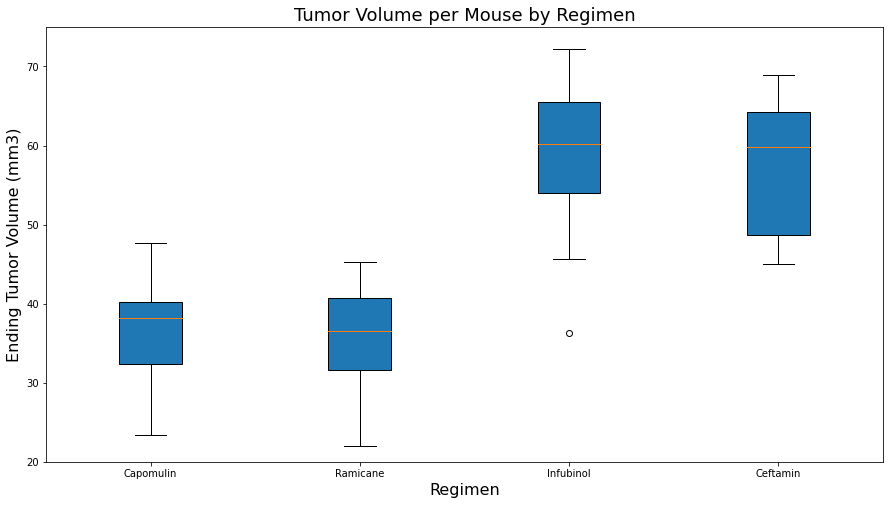

In [160]:
#Define plot components
final_tumor_volumes = [Capomulin_df["Tumor Volume (mm3)"],
                      Ramicane_df["Tumor Volume (mm3)"],
                      Infubinol_df["Tumor Volume (mm3)"],
                      Ceftamin_df["Tumor Volume (mm3)"]]
test_regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Set and Lable axis and title plot                       
ax1.set_title('Tumor Volume per Mouse by Regimen',fontsize =18)
ax1.set_ylabel('Ending Tumor Volume (mm3)',fontsize = 16)
ax1.set_xlabel('Regimen',fontsize = 16)
ax1.boxplot(final_tumor_volumes, labels=test_regimen, widths = 0.3, patch_artist=True,vert=True)

#Establish plot limits
plt.ylim(20, 75)

#Save image for potential reference in the report
plt.savefig("Tumor_Volume_per_Mouse_by_Regimen_box_plot.png")

plt.show()

## Line and Scatter Plots

In [20]:
#Choose records for a single mouse
Capomulin_df_all = max_point_dat_merged.loc[max_point_dat_merged["Drug Regimen"] == "Capomulin",:]
capomulin_1_mouse = Capomulin_df_all.loc[Capomulin_df_all["Mouse ID"] == "b128",:]
capomulin_1_mouse


,Mouse ID,MaxTimePoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
174,b128,45,0,45.000000,0,Capomulin,Female,9,22
175,b128,45,5,45.651331,0,Capomulin,Female,9,22
176,b128,45,10,43.270852,0,Capomulin,Female,9,22
177,b128,45,15,43.784893,0,Capomulin,Female,9,22
178,b128,45,20,42.731552,0,Capomulin,Female,9,22
179,b128,45,25,43.262145,1,Capomulin,Female,9,22
180,b128,45,30,40.605335,1,Capomulin,Female,9,22
181,b128,45,35,37.967644,1,Capomulin,Female,9,22
182,b128,45,40,38.379726,2,Capomulin,Female,9,22
183,b128,45,45,38.982878,2,Capomulin,Female,9,22


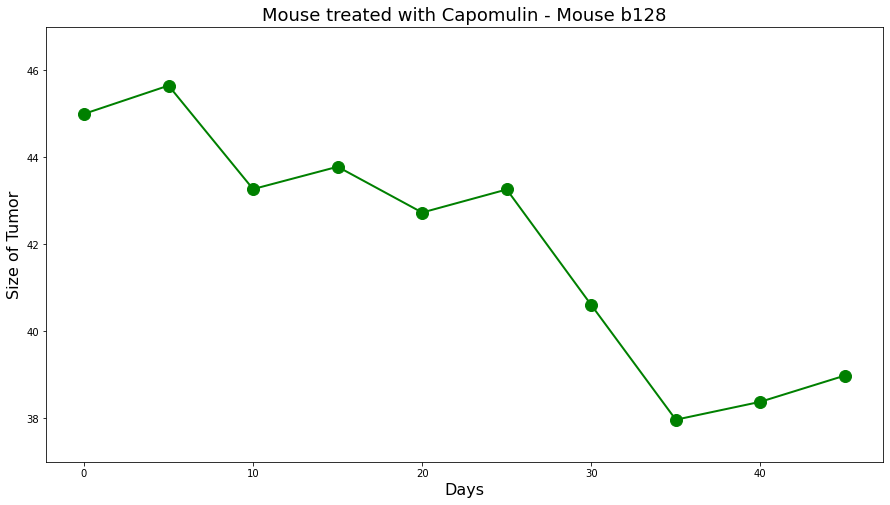

In [192]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Define plot components
x_axis = capomulin_1_mouse["Timepoint"]
sizeoftumor = capomulin_1_mouse["Tumor Volume (mm3)"]

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format plot
plt.plot(x_axis, sizeoftumor,linewidth=2, markersize=12,marker="o",color="green")

#define title and Lable axis
plt.title('Mouse treated with Capomulin - Mouse b128',fontsize =18)
plt.xlabel('Days',fontsize =16)
plt.ylabel('Size of Tumor',fontsize =16)

#Establish plot limits
plt.ylim(37, 47)

#Save image for potential reference in the report
plt.savefig("Mouse_treated_with_Capomulin_mouse_b128.png", bbox_inches = "tight")

plt.show()

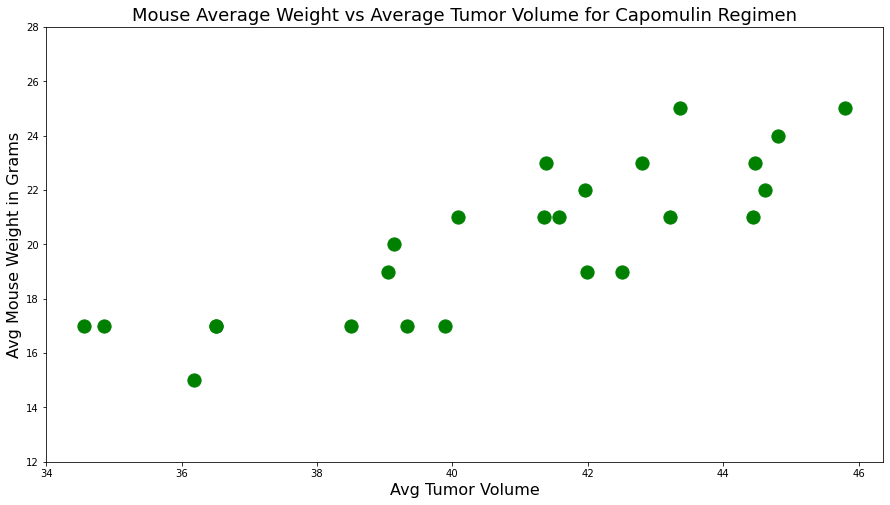

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Define plot components (calculate mean value for every column in Capomulin dataframe)
mean_capomulin =Capomulin_df_all.groupby(['Mouse ID']).mean()

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the Capomulin_df_all dataframe
plt.scatter(mean_capomulin['Tumor Volume (mm3)'],mean_capomulin['Weight (g)'],s=175, color="green")

#define title and Lable axis
plt.title('Mouse Average Weight vs Average Tumor Volume for Capomulin Regimen',fontsize =18)
plt.xlabel('Avg Tumor Volume',fontsize =16)
plt.ylabel('Avg Mouse Weight in Grams',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(12, 28)


#Save image for potential reference in the report
plt.savefig("Mse_Avg_Vol_vs_Avg_Wgt_Capomulin.png")

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [22]:
#Calculate correlation coefficient
Correlation_Coef = round(st.pearsonr(mean_capomulin['Tumor Volume (mm3)'],mean_capomulin['Weight (g)'])[0],5)
Correlation_Coef

0.84194

In [23]:
#Calulate linear formula
x_values = mean_capomulin['Tumor Volume (mm3)']
y_values = mean_capomulin['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Record results in a dataframe
linear_formula_Df = pd.DataFrame({
    "Corr Analysis":"Capomulin_VolvsWgt_CC",
    "Slope":{slope},
    "Intercept":{intercept},
    "rValueCorr_Coef":{rvalue},
    "PndasCorr_Coef":{Correlation_Coef},
    "StdErr":{stderr} 
} ,index=[0] )
linear_formula_Df

,Corr Analysis,Slope,Intercept,rValueCorr_Coef,PndasCorr_Coef,StdErr
0,Capomulin_VolvsWgt_CC,{0.7426941826944178},{-10.148863164111322},{0.8419363424694718},{0.84194},{0.09924763572688564}


In [24]:
#Create text for plot overlay
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = 0.74x + -10.15'

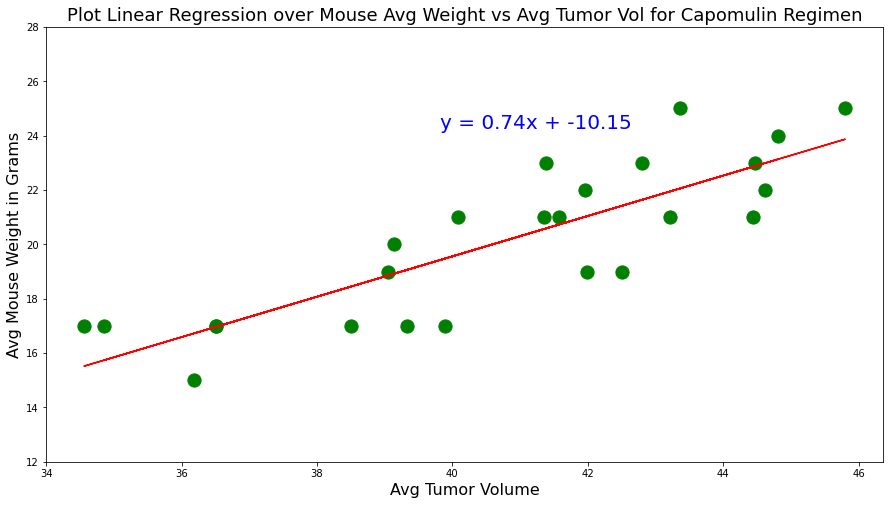

In [27]:
#Plot the linear regression model on top of the previous scatter plot

#Previous instructions repeated

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Add the linear regreassion and line to the plot

#Define plot components (calculate mean value for every column in Capomulin dataframe)
mean_capomulin =Capomulin_df_all.groupby(['Mouse ID']).mean()

#Charactorize figure size/layout                       
fig1, ax1 = plt.subplots(figsize=(15, 8))

#Build and format scatter plot based on mean values drawn from the Capomulin_df_all dataframe
plt.scatter(mean_capomulin['Tumor Volume (mm3)'],mean_capomulin['Weight (g)'],s=175, color="green")

#define title and Lable axis
plt.title('Plot Linear Regression over Mouse Avg Weight vs Avg Tumor Vol for Capomulin Regimen',fontsize =18)
plt.xlabel('Avg Tumor Volume',fontsize =16)
plt.ylabel('Avg Mouse Weight in Grams',fontsize =16)
marker_size = 12

#Establish plot limits
plt.ylim(12, 28)

# Add plot and text of linear regression model 
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_equation, xy=(35, 28), xycoords='data',xytext=(0.7, 0.8), textcoords='axes fraction',
             horizontalalignment='right', verticalalignment='top',fontsize=20,color="blue")


#Save image for potential reference in the report
plt.savefig("Reg_Plot_Avg_Vol_vs_Avg_Wgt_Capomulin.png")

plt.show()